# Capstone Study Region - Colorado

## Jacquelyn Witte

### For the presentation pitch this notebook outlines the study region and data highlights using the NASA Global Landslide Catalog provided by Elsa Culler - CU

In [1]:
import os

import earthpy as et
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from geopandas import GeoDataFrame
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.2, style="whitegrid")

In [2]:
# Change to data directory
data_dir = os.path.join(et.io.HOME,
                        'earth-analytics',
                        'data')
os.chdir(data_dir)

glc_file = os.path.join('capstone', 'landslide', 'nasa.glc.export.csv')
# glc_file = os.path.join('capstone', 'landslide', 'GLC03122015.csv')
os.path.exists(glc_file)

True

In [3]:
# Read the file
glc = pd.read_csv(glc_file)
glc

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,8/1/08 0:00,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,107.450000,32.562500
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,1/2/09 2:00,2:00,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,-122.663000,45.420000
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,1/19/07 0:00,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,-75.358700,-11.129500
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,7/31/09 0:00,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,81.708000,28.837800
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/10 12:00,12:00,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,123.897800,10.333600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,11109,4/1/17 13:34,8:00,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,7/28/17 13:34,12/19/17 21:42,2/15/18 15:51,111.679944,-7.853409
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,10845,3/25/17 17:32,unknown,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,9/21/17 17:32,12/5/17 18:45,2/15/18 15:51,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,10973,12/15/16 5:00,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,NaN,NaN,7/26/17 13:22,12/8/17 20:37,2/15/18 15:51,91.772042,26.181606
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,10901,4/29/17 19:03,7:00,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,NaN,NaN,7/14/17 19:03,12/7/17 21:19,2/15/18 15:51,73.472379,40.886395


In [4]:
glc_co = glc[(glc['country_code'] == 'US') & (
                                glc['admin_division_name'] == 'Colorado') & (
                                glc['landslide_trigger'] != 'freeze_thaw') &(
                                glc['landslide_trigger'] != 'snowfall_snowmelt')
            ]
# covert to datetime
glc_co['date'] = pd.to_datetime(glc_co['event_date'])
glc_co = glc_co.set_index('date').sort_index()
glc_co.shape

(140, 31)

In [5]:
print(glc_co['latitude'].isna().any())
print(glc_co['longitude'].isna().any())

False
False


In [6]:
glc_co['landslide_trigger']

date
2007-06-01 00:00:00     unknown
2007-08-14 00:00:00        rain
2007-09-06 00:00:00        rain
2007-09-17 00:00:00        rain
2008-04-13 00:00:00        rain
                         ...   
2016-08-07 00:00:00    downpour
2016-08-29 22:05:00     unknown
2016-09-11 00:00:00     unknown
2016-10-19 00:00:00     unknown
2016-10-19 08:15:00     unknown
Name: landslide_trigger, Length: 140, dtype: object

In [7]:
glc_co[glc_co['landslide_trigger'] == 'tropical_cyclone']

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
date,,,,,,,,,,,,,,,,,,,,,
2013-09-15,www.thedenverchannel.com,http://www.thedenverchannel.com/news/local-new...,5529,9/15/13 0:00,NaN,"Aspen Lodge Resort, Estes Park, Co","It's an amazing, but little known September st...","Aspen Lodge Resort, Estes Park, Co",1km,landslide,...,US,Colorado,5858.0,Estes Park,9.31567,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,-105.529,40.2935


In [8]:
glc_co_2015to2016 = glc_co[glc_co.index > '2015-04-01']

In [9]:
glc_co_2015to2016

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
date,,,,,,,,,,,,,,,,,,,,,
2015-04-27 00:00:00,Steamboat Today,http://www.steamboattoday.com/news/2015/jun/12...,6994,4/27/15 0:00,NaN,Howelsen Hill,The work will involve repositioning the chairl...,Howelsen Hill,1km,landslide,...,US,Colorado,12088.0,Steamboat Springs,0.83297,3/24/16 17:17,11/20/17 15:17,2/15/18 15:51,-106.8393,40.4802
2015-05-11 00:00:00,ABC7,http://www.thedenverchannel.com/news/local-new...,7047,5/11/15 0:00,NaN,"Wyoming Circle, Golden",The soil on North Table Mountain is so saturat...,"Wyoming Circle, Golden",exact,mudslide,...,US,Colorado,18867.0,Golden,2.66154,7/2/15 14:21,11/20/17 15:17,2/15/18 15:51,-105.2274,39.7790
2015-05-13 00:00:00,KKTV 11,http://www.kktv.com/home/headlines/Homeowners-...,7060,5/13/15 0:00,NaN,"6250 Fencerail Hts Colorado Springs, CO",The almost nonstop rain last week and over the...,"6250 Fencerail Hts Colorado Springs, CO",exact,landslide,...,US,Colorado,6680.0,Air Force Academy,8.38116,7/2/15 18:54,11/20/17 15:17,2/15/18 15:51,-104.8365,38.9218
2015-05-19 00:00:00,Fox 21 News,http://fox21news.com/2015/05/21/rock-slide-and...,7053,5/19/15 0:00,NaN,Phantom Canyon Road,“Our road crews went further up Phantom Canyon...,Phantom Canyon Road,10km,landslide,...,US,Colorado,3582.0,Penrose,15.49683,7/2/15 16:23,11/20/17 15:17,2/15/18 15:51,-105.0948,38.5526
2015-05-19 00:00:00,Wet Mountain Tribune,http://www.wetmountaintribune.com/home.asp?i=8...,7051,5/19/15 0:00,NaN,"Mile Marker 10, Oak Creek Grade Road",A severe mudslide closed Oak Creek Grade on Tu...,"Mile Marker 10, Oak Creek Grade Road",5km,mudslide,...,US,Colorado,3546.0,Lincoln Park,15.35824,7/2/15 16:06,11/20/17 15:17,2/15/18 15:51,-105.2706,38.2967
2015-05-19 00:00:00,Fox 21 News,http://fox21news.com/2015/05/21/rock-slide-and...,7052,5/19/15 0:00,NaN,Phantom Canyon Road,“Our road crews went further up Phantom Canyon...,Phantom Canyon Road,10km,landslide,...,US,Colorado,3582.0,Penrose,15.46134,7/2/15 16:21,11/20/17 15:17,2/15/18 15:51,-105.0973,38.5514
2015-05-21 00:00:00,KKTV 11 News,http://www.kktv.com/home/headlines/Saturated-G...,7048,5/21/15 0:00,NaN,A-1 Mobile Park,According to the Colorado Springs Fire Departm...,A-1 Mobile Park,1km,mudslide,...,US,Colorado,416427.0,Colorado Springs,2.19300,7/2/15 15:14,11/20/17 15:17,2/15/18 15:51,-104.8466,38.8327
2015-05-21 23:00:00,KOAA,http://www.koaa.com/story/29133869/rock-slide-...,7579,5/21/15 23:00,23:00,U.S. 50 near mile marker 226,A rock slide shut down all lanes of U.S. 50 ne...,U.S. 50 near mile marker 226,50km,landslide,...,US,Colorado,5236.0,Salida,6.67255,3/22/16 2:14,11/20/17 15:17,2/15/18 15:51,-105.9348,38.5019
2015-06-19 00:00:00,FOX 21 News,http://fox21news.com/2015/06/19/landslide-forc...,6940,6/19/15 0:00,NaN,"Conservation building, Cheyenne Mountain Zoo, ...",The wet weather has been causing some serious ...,"Conservation building, Cheyenne Mountain Zoo, ...",1km,landslide,...,US,Colorado,6900.0,Stratmoor,6.75748,6/24/15 20:42,11/20/17 15:17,2/15/18 15:51,-104.8574,38.7714


large 1
medium 85
small 52
very_large 2


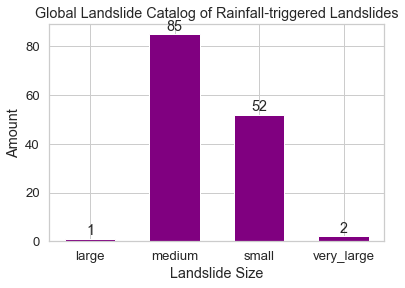

In [10]:
glc_co.columns
#glc_co[['landslide_size', 'injury_count']]

stack_plot = []
labels = []
for i, data in glc_co.groupby('landslide_size'):
    labels.append(i)
    stack_plot.append(data['landslide_size'].count())
    print(i, data['landslide_size'].count())

labels, stack_plot

f, ax = plt.subplots()
width = 0.6
bars = ax.bar(labels, stack_plot, width, color='purple')
ax.set(xlabel='Landslide Size',
       ylabel='Amount',
       title='Global Landslide Catalog of Rainfall-triggered Landslides')

ax.bar_label(bars, padding=1)

# Saving figure
plot_output = os.path.join(et.io.HOME,
                           'earth-analytics',
                           'ea-python-2022-capstone', 'plots',
                           'glc_landslide_size.jpg')

plt.savefig(plot_output)

continuous_rain 10
downpour 63
rain 42
tropical_cyclone 1
unknown 24


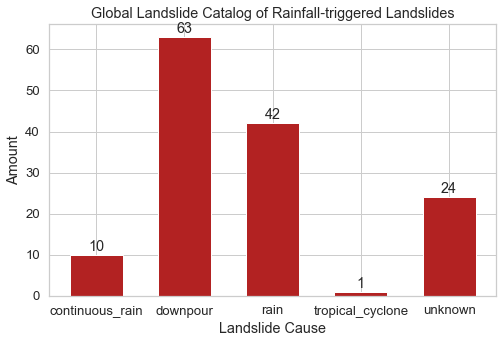

In [11]:
stack_plot = []
labels = []
for i, data in glc_co.groupby('landslide_trigger'):
    labels.append(i)
    stack_plot.append(data['landslide_trigger'].count())
    print(i, data['landslide_trigger'].count())

labels, stack_plot

f, ax = plt.subplots(figsize=(8,5))
width = 0.6
bars = ax.bar(labels, stack_plot, width, color='firebrick')
ax.set(xlabel='Landslide Cause',
       ylabel='Amount',
       title='Global Landslide Catalog of Rainfall-triggered Landslides')

ax.bar_label(bars, padding=1)

# Saving figure
plot_output = os.path.join(et.io.HOME,
                           'earth-analytics',
                           'ea-python-2022-capstone', 'plots',
                           'glc_landslide_cause.jpg')

plt.savefig(plot_output)

continuous_rain 10
downpour 13
rain 4
unknown 21


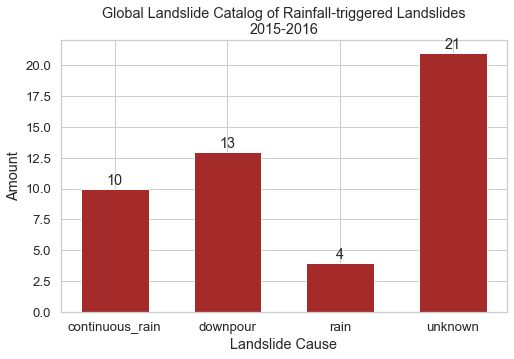

In [12]:
stack_plot = []
labels = []
for i, data in glc_co_2015to2016.groupby('landslide_trigger'):
    labels.append(i)
    stack_plot.append(data['landslide_trigger'].count())
    print(i, data['landslide_trigger'].count())

labels, stack_plot

f, ax = plt.subplots(figsize=(8,5))
width = 0.6
bars = ax.bar(labels, stack_plot, width, color='brown')
ax.set(xlabel='Landslide Cause',
       ylabel='Amount',
       title='Global Landslide Catalog of Rainfall-triggered Landslides\n2015-2016')

ax.bar_label(bars, padding=1)

# Saving figure
plot_output = os.path.join(et.io.HOME,
                           'earth-analytics',
                           'ea-python-2022-capstone', 'plots',
                           'glc_landslide_cause_2015-2016.jpg')

plt.savefig(plot_output)

### Map the landslides over Colorado

In [13]:
geometry = [Point(xy) for xy in zip(glc_co['longitude'], glc_co['latitude'])]
crs = 'epsg:4326'
glc_co_epsg4326 = GeoDataFrame(glc_co, crs=crs, geometry=geometry)

In [14]:
glc_co_epsg4326[glc_co_epsg4326['landslide_trigger'] == 'downpour']

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,geometry
date,,,,,,,,,,,,,,,,,,,,,
2008-07-13 00:00:00,durangoherald.com,http://durangoherald.com/asp-bin/article_gener...,643,7/13/08 0:00,NaN,"Durango, CO",The National Weather Service in Grand Junction...,"Durango, CO",5km,mudslide,...,Colorado,16887.0,Durango,2.94432,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,-107.8700,37.2500,POINT (-107.87000 37.25000)
2008-07-22 00:00:00,The Denver Channel,http://www.thedenverchannel.com/news/16954063/...,658,7/22/08 0:00,NaN,"Lower River Road near Basalt in Pitkin County,...",A large mudslide trapped a car as heavy rain f...,"Lower River Road near Basalt in Pitkin County,...",5km,mudslide,...,Colorado,2826.0,Snowmass Village,10.78549,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,-106.9300,39.3100,POINT (-106.93000 39.31000)
2008-07-27 00:00:00,chieftain,http://www.chieftain.com/articles/2008/07/29/n...,675,7/27/08 0:00,NaN,"US Highway 160, La Veta Pass, CO","occurred just after 4pm, mudslide was 100 yard...","US Highway 160, La Veta Pass, CO",25km,mudslide,...,Colorado,3068.0,Walsenburg,32.15868,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,-105.1350,37.5588,POINT (-105.13500 37.55880)
2010-06-28 19:00:00,themountainmail,http://www.themountainmail.com/main.asp?Sectio...,2027,6/28/10 19:00,19:00,"CR 162 at inchesthe dipinches, detour onto CR ...",Flash flooding closed CRs 162 and 339 Monday n...,"CR 162 at inchesthe dipinches, detour onto CR ...",5km,landslide,...,Colorado,2617.0,Buena Vista,13.11084,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,-106.1670,38.7275,POINT (-106.16700 38.72750)
2010-07-23 14:30:00,durangoherald,http://www.durangoherald.com/sections/News/201...,2123,7/23/10 14:30,14:00,"US 160 just east of CR 207, west of Durango, CO",Monsoons triggered a falling boulder on U.S. H...,"US 160 just east of CR 207, west of Durango, CO",1km,rock_fall,...,Colorado,16887.0,Durango,4.89100,4/1/14 0:00,11/20/17 15:17,2/15/18 15:51,-107.9352,37.2743,POINT (-107.93520 37.27430)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-20 14:30:00,The Denver Channel,http://www.thedenverchannel.com/news/mountains...,9116,7/20/16 14:30,14:00,"Highway 145 between Sawpit and Placerville, Sa...",One of a dozen mudslides caused by same rainfa...,"Highway 145 between Sawpit and Placerville, Sa...",5km,mudslide,...,Colorado,1320.0,Mountain Village,15.29786,7/21/16 20:37,11/20/17 15:17,2/15/18 15:51,-108.0120,37.9933,POINT (-108.01200 37.99330)
2016-07-20 14:30:00,The Denver Channel,http://www.thedenverchannel.com/news/mountains...,9114,7/20/16 14:30,14:00,"Highway 145 between Sawpit and Placerville, Sa...",One of a dozen mudslides caused by same rainfa...,"Highway 145 between Sawpit and Placerville, Sa...",5km,mudslide,...,Colorado,1320.0,Mountain Village,16.08433,7/21/16 20:36,11/20/17 15:17,2/15/18 15:51,-108.0216,37.9939,POINT (-108.02160 37.99390)
2016-07-20 14:30:00,The Denver Channel,http://www.thedenverchannel.com/news/mountains...,9112,7/20/16 14:30,14:00,"Highway 145 between Sawpit and Placerville, Sa...",One of a dozen mudslides caused by same rainfa...,"Highway 145 between Sawpit and Placerville, Sa...",5km,mudslide,...,Colorado,1320.0,Mountain Village,17.22937,7/21/16 20:36,11/20/17 15:17,2/15/18 15:51,-108.0336,37.9979,POINT (-108.03360 37.99790)


In [15]:
glc_co_epsg4326.index.min(), glc_co_epsg4326.index.max()

(Timestamp('2007-06-01 00:00:00'), Timestamp('2016-10-19 08:15:00'))

In [16]:
# Create Title
loc = 'Rainfall-triggered Landslides in Colorado (2007 - 2016)'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

m = folium.Map([39.0, -105.27], zoom_start= 7, tiles='Stamen Terrain')
folium.GeoJson(glc_co_epsg4326).add_to(m)


#Add Title
m.get_root().html.add_child(folium.Element(title_html))

m

### Let's try and be more creative

In [17]:
triggers = np.unique(glc_co_epsg4326['landslide_trigger'])
triggers

array(['continuous_rain', 'downpour', 'rain', 'tropical_cyclone',
       'unknown'], dtype=object)

In [18]:
# Create a symbology dictionary that maps "type" to color. 
colors = ['red', 'green', 'blue', 'orange','lightgray']
points_symb = dict(zip(triggers,colors))
points_symb

{'continuous_rain': 'red',
 'downpour': 'green',
 'rain': 'blue',
 'tropical_cyclone': 'orange',
 'unknown': 'lightgray'}

In [19]:
m2 = folium.Map([39.0, -105.27], zoom_start=7, tiles='Stamen Terrain')

for i, loc in glc_co_epsg4326.iterrows():
    # print(i, loc['latitude'], loc['longitude'])
    folium.Marker(location=[loc['latitude'], loc['longitude']],
                  icon=folium.Icon(color=points_symb[loc['landslide_trigger']],
                                   prefix='glyphicon', icon='off')).add_to(m2)

# Continuous Rain
folium.CircleMarker(location=[40.5, -103], radius=10,
                    color='red',
                    fill_color='red',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[40.5, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Continuous Rain'}</b>""")
).add_to(m2)

# Downpour
folium.CircleMarker(location=[40, -103], radius=10,
                    color='green',
                    fill_color='green',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[40, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Downpour'}</b>""")
).add_to(m2)

# Rain
folium.CircleMarker(location=[39.5, -103], radius=10,
                    color='blue',
                    fill_color='blue',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[39.5, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Rain'}</b>""")
).add_to(m2)
   
    
# Tropical Cyclone
folium.CircleMarker(location=[39., -103], radius=10,
                    color='orange',
                    fill_color='orange',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[39., -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Tropical Cyclone'}</b>""")
).add_to(m2)
   
# Unknown
folium.CircleMarker(location=[38.5, -103], radius=10,
                    color='lightgray',
                    fill_color='lightgray',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[38.5, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Unknown'}</b>""")
).add_to(m2)

    
#Add Title
m2.get_root().html.add_child(folium.Element(title_html))

m2

In [20]:
map_output = os.path.join(et.io.HOME,
                           'earth-analytics',
                           'capstone-landslides-soilmoisture', 'plots',
                           'map_landslides_sites.html')
m2.save(map_output)